In [54]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os
import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# file_path = "/content/drive/MyDrive/csv_files"

# # List all the files in the directory
# file_list = os.listdir(file_path)

# # List to hold all DataFrames
# df_list = []

# # Append all files together
# for file in file_list:
#     full_path = os.path.join(file_path, file)
#     df_temp = pd.read_csv(full_path)
#     df_list.append(df_temp,)

# # Concatenate all DataFrames
# df = pd.concat(df_list). reset_index(drop=True)

# df


dfs = []
for i in range(1, 5):
    path = '/content/drive/MyDrive/csv_files/UNSW-NB15_{}.csv'  # Note the use of raw string
    dfs.append(pd.read_csv(path.format(i), header=None))
combined_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

# Optionally, display the first few rows of the combined dataframe
print(combined_data.head())

<ipython-input-40-139eb1d63eb7>:24: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header=None))
<ipython-input-40-139eb1d63eb7>:24: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(path.format(i), header=None))


           0      1              2     3    4    5         6    7    8   9   \
0  59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055  132  164  31   
1  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528  304  31   
2  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146  178  31   
3  59.166.0.5   3593  149.171.126.5    53  udp  CON  0.001209  132  164  31   
4  59.166.0.3  49664  149.171.126.0    53  udp  CON  0.001169  146  178  31   

   ...  39  40  41 42  43  44  45  46   47  48  
0  ...   0   3   7  1   3   1   1   1  NaN   0  
1  ...   0   2   4  2   3   1   1   2  NaN   0  
2  ...   0  12   8  1   2   2   1   1  NaN   0  
3  ...   0   6   9  1   1   1   1   1  NaN   0  
4  ...   0   7   9  1   1   1   1   1  NaN   0  

[5 rows x 49 columns]


In [41]:
dataset_columns = pd.read_csv(r'/content/drive/MyDrive/NUSW-NB15_features.csv.xls',encoding='ISO-8859-1')
dataset_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No.          49 non-null     int64 
 1   Name         49 non-null     object
 2   Type         49 non-null     object
 3   Description  49 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [42]:
combined_data.columns = dataset_columns['Name']
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

In [6]:
combined_data['attack_cat'].isnull().sum()


2218764

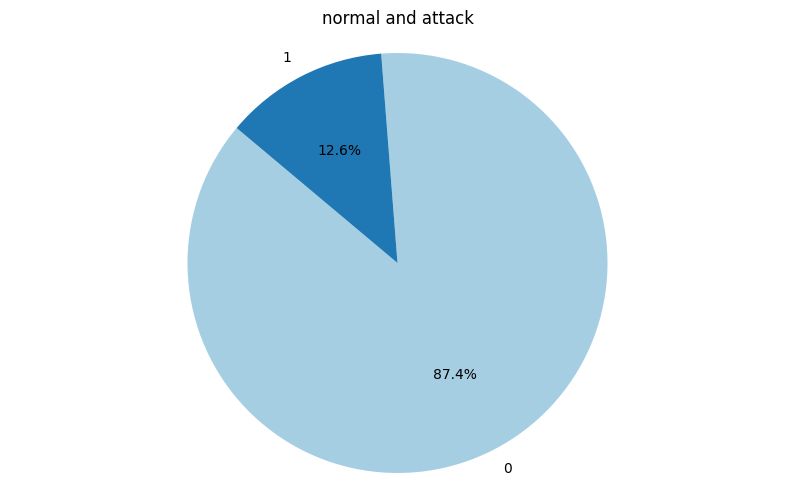

In [7]:
import matplotlib.pyplot as plt

class_counts = combined_data['Label'].value_counts()


classes = class_counts.index
counts = class_counts.values

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('normal and attack')
plt.axis('equal')
plt.show()

In [8]:
combined_data['attack_cat'] = combined_data['attack_cat'].fillna(value='normal').apply(lambda x: x.strip().lower())

In [9]:
combined_data['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3, '0', '1', ' ', '2', '4'], dtype=object)

In [10]:
combined_data['ct_ftp_cmd'] = combined_data['ct_ftp_cmd'].replace(to_replace=' ', value=0).astype(int)

In [11]:
combined_data['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3])

In [12]:
combined_data['is_ftp_login'] = combined_data['is_ftp_login'].fillna(value=0)

In [13]:
combined_data['is_ftp_login'] = np.where(combined_data['is_ftp_login']>1, 1, combined_data['is_ftp_login'])

In [15]:
combined_data['service'] = combined_data['service'].apply(lambda x:"None" if x=='-' else x)

In [14]:
combined_data.drop(columns=['sport','dsport','srcip','dstip'],inplace=True)

In [16]:
num_col = list(combined_data.select_dtypes(include='number').columns)
# Assume 'label' is the class label column
class_label = 'Label'

num_col.remove(class_label)
print(num_col)

['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [17]:
correlations = combined_data[num_col + [class_label]].corr(method='pearson')[class_label].drop(class_label).abs().sort_values(ascending=False)


print(correlations)

Name
sttl                0.904393
ct_state_ttl        0.873694
ct_dst_src_ltm      0.439916
ct_dst_sport_ltm    0.419056
ct_src_dport_ltm    0.396749
ct_srv_dst          0.386509
ct_srv_src          0.383007
ct_src_ ltm         0.343246
ct_dst_ltm          0.339464
swin                0.315108
dwin                0.313920
Ltime               0.275660
Stime               0.275660
dmeansz             0.272397
dtcpb               0.233513
stcpb               0.233422
Dload               0.219710
Sload               0.192278
ackdat              0.143443
tcprtt              0.143109
dttl                0.134947
synack              0.122253
Spkts               0.120880
Dpkts               0.115947
dloss               0.095855
ct_flw_http_mthd    0.083188
dbytes              0.075543
smeansz             0.065363
Djit                0.054420
sloss               0.043272
is_ftp_login        0.032642
ct_ftp_cmd          0.029654
trans_depth         0.029041
res_bdy_len         0.027339
Sjit     

In [18]:
combined_data.drop(columns=['sttl','ct_state_ttl'],inplace=True)

In [19]:
categorical_col =[col for col in combined_data.columns if combined_data[col].dtype == 'object']

In [20]:
le = LabelEncoder()

In [21]:
for col in categorical_col :
  combined_data[col] = le.fit_transform(combined_data[col])

In [22]:
combined_data

Name,proto,state,dur,sbytes,dbytes,dttl,sloss,dloss,service,Sload,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,120,2,0.001055,132,164,29,0,0,2,500473.937500,...,0,3,7,1,3,1,1,1,7,0
1,120,2,0.036133,528,304,29,0,0,0,87676.085940,...,0,2,4,2,3,1,1,2,7,0
2,120,2,0.001119,146,178,29,0,0,2,521894.531300,...,0,12,8,1,2,2,1,1,7,0
3,120,2,0.001209,132,164,29,0,0,2,436724.562500,...,0,6,9,1,1,1,1,1,7,0
4,120,2,0.001169,146,178,29,0,0,2,499572.250000,...,0,7,9,1,1,1,1,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,114,5,0.087306,320,1828,29,1,2,4,24465.671880,...,0,1,2,3,3,1,1,3,7,0
2540043,114,2,0.365058,456,346,29,2,2,3,8743.816406,...,2,2,2,2,2,2,2,2,7,0
2540044,114,2,6.335154,1802,2088,29,7,9,3,2204.839844,...,2,2,2,4,2,2,2,2,7,0
2540045,114,2,2.200934,3498,166054,29,2,57,5,12496.513670,...,0,1,1,2,4,2,2,2,7,0


In [23]:
num_col = list(combined_data.select_dtypes(include='number').columns)
num_col.remove('Label')
num_col.remove('attack_cat')
print(num_col)

['proto', 'state', 'dur', 'sbytes', 'dbytes', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [24]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [25]:
data = normalization(combined_data.copy(),num_col)

In [26]:
df = data

In [27]:
df

Name,proto,state,dur,sbytes,dbytes,dttl,sloss,dloss,service,Sload,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,0.895522,0.133333,1.200687e-07,0.000009,0.000011,0.114173,0.000000,0.000000,0.166667,8.357948e-05,...,0.00,0.030303,0.090909,0.000000,0.030303,0.000000,0.000000,0.000000,7,0
1,0.895522,0.133333,4.112267e-06,0.000037,0.000021,0.114173,0.000000,0.000000,0.000000,1.464196e-05,...,0.00,0.015152,0.045455,0.015152,0.030303,0.000000,0.000000,0.015152,7,0
2,0.895522,0.133333,1.273525e-07,0.000010,0.000012,0.114173,0.000000,0.000000,0.166667,8.715673e-05,...,0.00,0.166667,0.106061,0.000000,0.015152,0.015152,0.000000,0.000000,7,0
3,0.895522,0.133333,1.375953e-07,0.000009,0.000011,0.114173,0.000000,0.000000,0.166667,7.293329e-05,...,0.00,0.075758,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000,7,0
4,0.895522,0.133333,1.330429e-07,0.000010,0.000012,0.114173,0.000000,0.000000,0.166667,8.342890e-05,...,0.00,0.090909,0.121212,0.000000,0.000000,0.000000,0.000000,0.000000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540042,0.850746,0.333333,9.936224e-06,0.000022,0.000125,0.114173,0.000188,0.000363,0.333333,4.085783e-06,...,0.00,0.000000,0.015152,0.030303,0.030303,0.000000,0.000000,0.030303,7,0
2540043,0.850746,0.133333,4.154695e-05,0.000032,0.000024,0.114173,0.000376,0.000363,0.250000,1.460223e-06,...,0.25,0.015152,0.015152,0.015152,0.015152,0.015152,0.016949,0.015152,7,0
2540044,0.850746,0.133333,7.209987e-04,0.000126,0.000142,0.114173,0.001316,0.001634,0.250000,3.682097e-07,...,0.25,0.015152,0.015152,0.045455,0.015152,0.015152,0.016949,0.015152,7,0
2540045,0.850746,0.133333,2.504865e-04,0.000244,0.011329,0.114173,0.000376,0.010350,0.416667,2.086926e-06,...,0.00,0.000000,0.000000,0.015152,0.045455,0.015152,0.016949,0.015152,7,0


In [28]:
df=df.drop('attack_cat' , axis=1)
X=df.drop('Label', axis=1)
Y=df['Label']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

<Axes: xlabel='Name', ylabel='Name'>

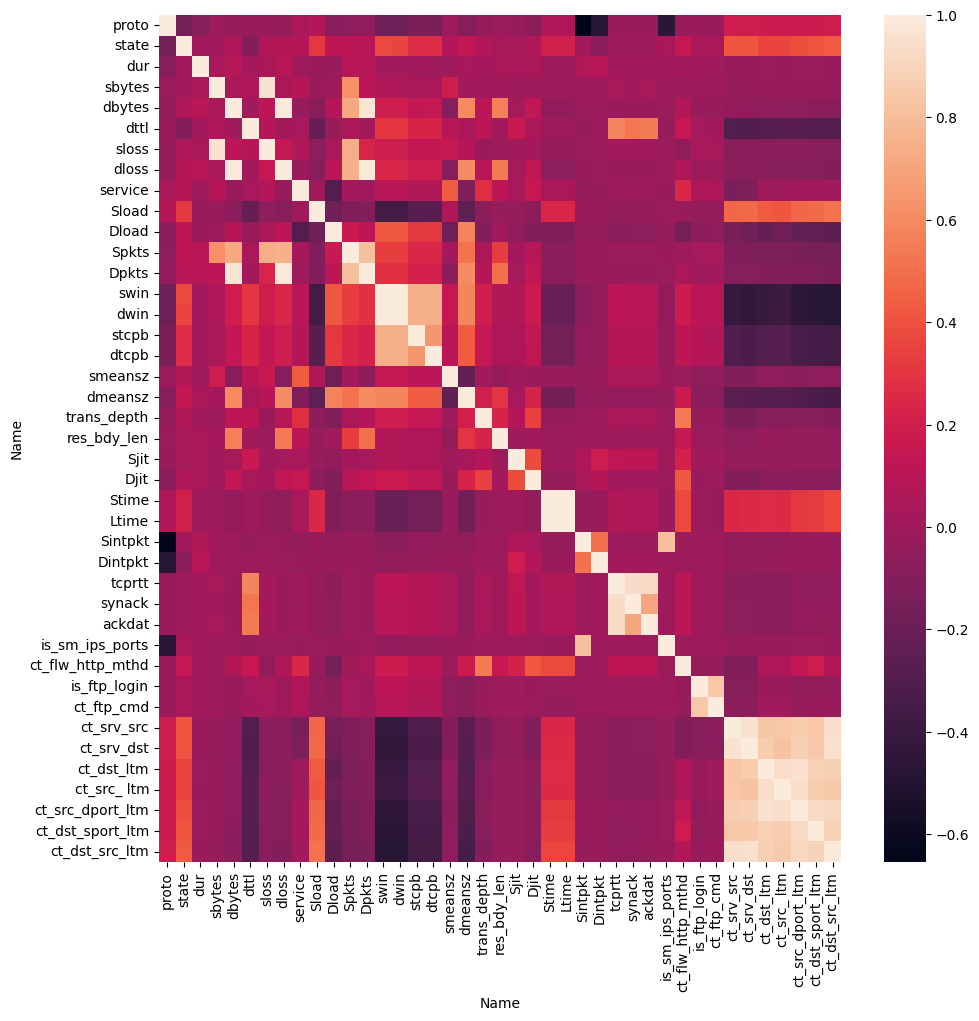

In [29]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [30]:
upper_triangle_mask = corrmat.where(
    np.triu(np.ones(corrmat.shape), k=1).astype(bool)
)

# Find index pairs where correlation is greater than 0.9
highly_correlated_pairs = [
    column for column in upper_triangle_mask.columns
    if any(upper_triangle_mask[column] >= 0.9)
]
print("Highly correlated pairs:\n", highly_correlated_pairs)

Highly correlated pairs:
 ['sloss', 'dloss', 'Dpkts', 'dwin', 'Ltime', 'synack', 'ackdat', 'ct_srv_dst', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [31]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    columns = corr_matrix.columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                print(f"{columns[i]:20s} {columns[j]:20s} {corr_matrix.iloc[i, j]}")
                col_corr.add(colname)
    return col_corr

In [32]:

corr_features = correlation(X_train, 0.9)
len(set(corr_features))

sloss                sbytes               0.9581285657607477
dloss                dbytes               0.9913325160765767
Dpkts                dbytes               0.9706236361050897
Dpkts                dloss                0.9919988285854276
dwin                 swin                 0.9971600128221935
Ltime                Stime                0.9999999997898935
synack               tcprtt               0.9297911269442942
ackdat               tcprtt               0.9185516459008916
ct_srv_dst           ct_srv_src           0.9567993915238217
ct_src_ ltm          ct_dst_ltm           0.93859720622933
ct_src_dport_ltm     ct_dst_ltm           0.9602537526169889
ct_src_dport_ltm     ct_src_ ltm          0.9452983773229735
ct_dst_sport_ltm     ct_src_dport_ltm     0.9214678374517744
ct_dst_src_ltm       ct_srv_src           0.9422207389819297
ct_dst_src_ltm       ct_srv_dst           0.9510651409874641
ct_dst_src_ltm       ct_src_dport_ltm     0.9109912693765526


12

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778032 entries, 262209 to 305711
Data columns (total 30 columns):
 #   Column            Dtype  
---  ------            -----  
 0   proto             float64
 1   state             float64
 2   dur               float64
 3   dttl              float64
 4   sloss             float64
 5   dloss             float64
 6   service           float64
 7   Sload             float64
 8   Dload             float64
 9   Spkts             float64
 10  dwin              float64
 11  stcpb             float64
 12  dtcpb             float64
 13  smeansz           float64
 14  dmeansz           float64
 15  trans_depth       float64
 16  res_bdy_len       float64
 17  Sjit              float64
 18  Djit              float64
 19  Ltime             float64
 20  Sintpkt           float64
 21  Dintpkt           float64
 22  synack            float64
 23  is_sm_ips_ports   float64
 24  ct_flw_http_mthd  float64
 25  is_ftp_login      float64
 26  ct_ftp_cmd     

In [43]:
to_drop = X_train.drop(['sbytes','Dpkts','dbytes','ct_dst_src_ltm','swin','ackdat','Stime','tcprtt','ct_srv_src','ct_dst_ltm','ct_src_dport_ltm'],axis=1)


KeyError: "['sbytes', 'Dpkts', 'dbytes', 'ct_dst_src_ltm', 'swin', 'ackdat', 'Stime', 'tcprtt', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm'] not found in axis"

In [36]:
X_train = X_train.drop(['sbytes','Dpkts','dbytes','ct_dst_src_ltm','swin','ackdat','Stime','tcprtt','ct_srv_src','ct_dst_ltm','ct_src_dport_ltm'],axis=1)

In [44]:
X_train

Name,proto,state,dur,dttl,sloss,dloss,service,Sload,Dload,Spkts,...,Sintpkt,Dintpkt,synack,is_sm_ips_ports,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_dst,ct_src_ ltm,ct_dst_sport_ltm
262209,0.850746,0.333333,3.411430e-06,0.114173,0.001316,0.005084,0.000000,0.000176,0.118167,0.006387,...,5.245812e-06,0.000007,0.000123,0.0,0.000000,0.0,0.0,0.045455,0.015152,0.000000
225020,0.850746,0.333333,1.235171e-06,0.114173,0.001316,0.001997,0.000000,0.000267,0.073957,0.003194,...,3.789159e-06,0.000005,0.000117,0.0,0.000000,0.0,0.0,0.030303,0.060606,0.000000
1802864,0.850746,0.333333,1.245880e-04,0.114173,0.000564,0.000908,0.416667,0.000002,0.000545,0.001315,...,9.977559e-04,0.001082,0.000124,0.0,NaN,0.0,0.0,0.000000,0.030303,0.000000
919097,0.850746,0.333333,2.494697e-06,0.114173,0.001316,0.002542,0.000000,0.000152,0.064381,0.003757,...,6.558601e-06,0.000009,0.000132,0.0,0.000000,0.0,0.0,0.090909,0.015152,0.000000
1401105,0.850746,0.333333,1.177381e-04,0.114173,0.000564,0.000908,0.416667,0.000002,0.000577,0.001127,...,1.114298e-03,0.001023,0.000106,0.0,0.027778,0.0,0.0,0.015152,0.045455,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,0.895522,0.400000,1.024283e-09,0.000000,0.000000,0.000000,0.166667,0.019595,0.000000,0.000188,...,1.066711e-07,0.000000,0.000000,0.0,NaN,0.0,0.0,0.333333,0.333333,0.372881
963395,0.850746,0.333333,4.850467e-05,0.114173,0.001128,0.001090,0.000000,0.000006,0.000346,0.002067,...,2.403424e-04,0.000311,0.000138,0.0,0.000000,0.0,0.0,0.181818,0.000000,0.000000
2215104,0.850746,0.333333,7.601190e-05,0.992126,0.000564,0.000363,0.000000,0.000002,0.000062,0.001127,...,7.002537e-04,0.001443,0.014767,0.0,NaN,0.0,0.0,0.015152,0.000000,0.000000
1484405,0.850746,0.333333,4.754492e-06,0.114173,0.001316,0.003813,0.000000,0.000104,0.054282,0.005072,...,9.637354e-06,0.000013,0.000120,0.0,NaN,0.0,0.0,0.075758,0.015152,0.000000


In [45]:
selected = X_train.corrwith(df['Label']).abs().sort_values(ascending=False)
print(selected)

Name
ct_dst_sport_ltm    0.417940
ct_srv_dst          0.385264
ct_src_ ltm         0.342087
state               0.337043
dwin                0.313164
Ltime               0.275417
dmeansz             0.272096
dtcpb               0.232920
stcpb               0.232579
Dload               0.219612
Sload               0.191838
dttl                0.136137
synack              0.124579
Spkts               0.117550
dloss               0.096302
ct_flw_http_mthd    0.083510
smeansz             0.065051
Djit                0.054518
sloss               0.039240
is_ftp_login        0.032349
ct_ftp_cmd          0.029386
trans_depth         0.027330
res_bdy_len         0.027233
Sjit                0.021957
Sintpkt             0.019102
is_sm_ips_ports     0.015511
Dintpkt             0.010383
service             0.009911
proto               0.003806
dur                 0.001951
dtype: float64


In [46]:
selected = selected.sort_values(ascending=False).head(15).index

In [47]:
X_train = X_train[selected]

In [48]:
X_train.shape , X_test.shape

((1778032, 15), (762015, 41))

In [49]:
X_test = X_test[selected]

In [50]:
X_train.shape , X_test.shape

((1778032, 15), (762015, 15))

In [51]:
from sklearn.model_selection import cross_val_score, KFold

Cross-validation classification report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00   1553306
      attack       0.97      0.97      0.97    224726

    accuracy                           0.99   1778032
   macro avg       0.98      0.98      0.98   1778032
weighted avg       0.99      0.99      0.99   1778032

Test set classification report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00    665458
      attack       0.97      0.97      0.97     96557

    accuracy                           0.99    762015
   macro avg       0.98      0.98      0.98    762015
weighted avg       0.99      0.99      0.99    762015



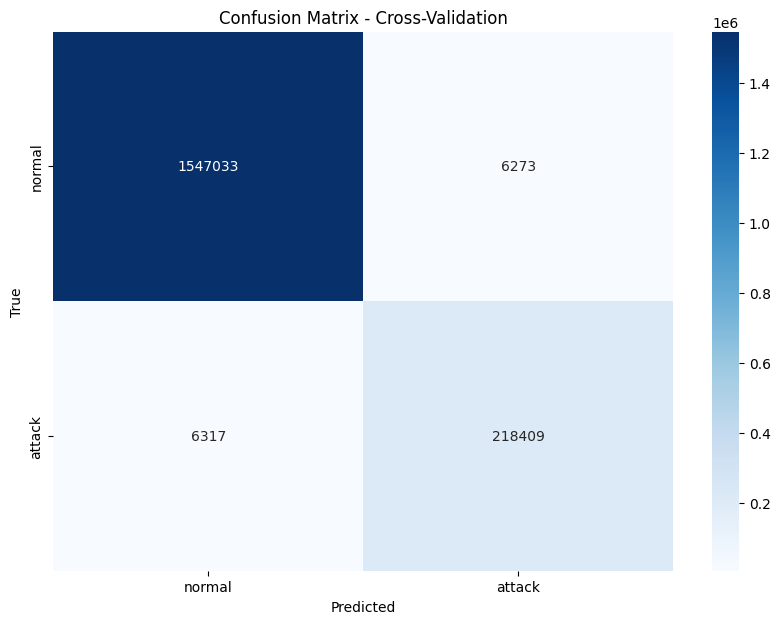

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_predict

kf = KFold(n_splits=10, shuffle=False)
y_pred_cv = cross_val_predict(dt_bin, X_train, y_train, cv=kf)

# Train the model on the entire training set and predict on the test set
dt_bin.fit(X_train, y_train)
y_pred = dt_bin.predict(X_test)

# Assuming you have target names defined like this
target_names = ['normal', 'attack']  # Replace with your actual class names

# Generate and print the classification report for cross-validation
cls_report_cv = classification_report(y_true=y_train, y_pred=y_pred_cv, target_names=target_names)
print("Cross-validation classification report:")
print(cls_report_cv)

# Generate and print the classification report for test set
cls_report_test = classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print("Test set classification report:")
print(cls_report_test)

# Generate the confusion matrix for cross-validation predictions
conf_matrix_cv = confusion_matrix(y_true=y_train, y_pred=y_pred_cv)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Cross-Validation')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
cv_scores = cross_val_score(dt_bin, X_train, y_train, cv=cv, scoring='accuracy')


In [ ]:
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {np.mean(cv_scores):.4f}')
print(f'Standard deviation of cross-validation accuracy: {np.std(cv_scores):.4f}')


Cross-validation accuracy scores: [0.99466829 0.99402713 0.99443204 0.99449391 0.99421832 0.99461764
 0.99434768 0.99443204 0.9943533  0.99458952]
Mean cross-validation accuracy: 0.9944
Standard deviation of cross-validation accuracy: 0.0002


In [ ]:
dt_bin.fit(X_train,y_train)

In [ ]:
y_pred = dt_bin.predict(X_test)

In [ ]:

print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

Mean Absolute Error -  0.0052348050891386656
Mean Squared Error -  0.0052348050891386656
Root Mean Squared Error -  0.07235195290480186
Accuracy -  99.47651949108614


In [ ]:
target = ['normal', 'attack']

In [ ]:
cls_report= classification_report(y_true=y_test, y_pred=y_pred,target_names=target)
print(cls_report)

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00    665458
      attack       0.98      0.98      0.98     96557

    accuracy                           0.99    762015
   macro avg       0.99      0.99      0.99    762015
weighted avg       0.99      0.99      0.99    762015

